In [1]:
import cv2
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic         # holistic model for tracking body joints
mp_drawing = mp.solutions.drawing_utils     # drawing utilities

In [3]:
def mediapipe_detection(image, model):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # Converts an image from one color space to another
  image.flags.writeable = False                    # Making image unwritable before processing to save memory
  results = model.process(image)
  image.flags.writeable = True
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  return image, results

In [4]:
cap = cv2.VideoCapture(0)
# with mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
      ret, frame = cap.read()
      image, results = mediapipe_detection(frame, holistic)
      cv2.imshow('OpenCV Feed', frame)
      if cv2.waitKey(10) & 0xFF == ord('q'):
          break
cap.release()
cv2.destroyAllWindows()

In [6]:
results.face_landmarks
# results.left_hand_landmarks
# results.pose_landmarks
# results.pose_world_landmarks
# results.right_hand_landmarks

landmark {
  x: 0.5953571200370789
  y: 0.5829976797103882
  z: -0.038655947893857956
}
landmark {
  x: 0.5926210284233093
  y: 0.5198584794998169
  z: -0.07029423862695694
}
landmark {
  x: 0.5929812788963318
  y: 0.5399783253669739
  z: -0.0374339334666729
}
landmark {
  x: 0.5774921178817749
  y: 0.46182093024253845
  z: -0.052290115505456924
}
landmark {
  x: 0.5915782451629639
  y: 0.5009520649909973
  z: -0.07451488077640533
}
landmark {
  x: 0.589934229850769
  y: 0.4769779145717621
  z: -0.06909901648759842
}
landmark {
  x: 0.5858486890792847
  y: 0.4211314916610718
  z: -0.03320019319653511
}
landmark {
  x: 0.4926337003707886
  y: 0.42981117963790894
  z: 0.017176805064082146
}
landmark {
  x: 0.5832355618476868
  y: 0.38105151057243347
  z: -0.024285927414894104
}
landmark {
  x: 0.5820647478103638
  y: 0.35720908641815186
  z: -0.026721222326159477
}
landmark {
  x: 0.5771861672401428
  y: 0.2702380418777466
  z: -0.010961485095322132
}
landmark {
  x: 0.5958388447761536
 

In [24]:
frame

array([[[ 85,  48,  22],
        [ 87,  44,  16],
        [ 92,  42,  13],
        ...,
        [ 56,  65,  96],
        [ 58,  64, 100],
        [ 58,  64, 100]],

       [[ 83,  46,  19],
        [ 84,  41,  14],
        [ 88,  40,  12],
        ...,
        [ 53,  63,  92],
        [ 56,  63,  97],
        [ 57,  64,  98]],

       [[ 80,  45,  17],
        [ 80,  40,  14],
        [ 83,  38,  15],
        ...,
        [ 52,  64,  89],
        [ 53,  63,  92],
        [ 55,  66,  94]],

       ...,

       [[ 71,  28,   2],
        [ 76,  33,   4],
        [ 84,  42,  11],
        ...,
        [ 87,  51,  18],
        [ 92,  53,  21],
        [ 97,  57,  26]],

       [[ 73,  28,   1],
        [ 77,  32,   2],
        [ 80,  35,   2],
        ...,
        [ 84,  48,  17],
        [ 88,  50,  21],
        [ 95,  57,  28]],

       [[ 73,  27,   0],
        [ 78,  31,   0],
        [ 80,  33,   0],
        ...,
        [ 80,  45,  14],
        [ 84,  48,  19],
        [ 91,  55,  26]]

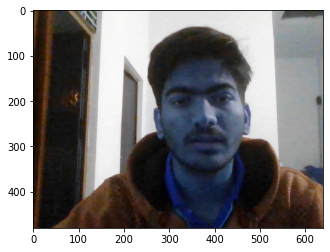

In [15]:
plt.imshow(frame)

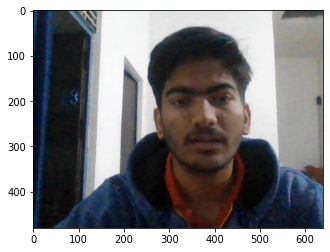

In [16]:
# convert color from BGR to RGB
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
# colour formats follow BGR

def draw_landmarks(image, results):
  # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
  #  mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1, circle_radius=1))  # white

  mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
   mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=1, circle_radius=1))  # white
  
  mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
   mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1))    # blue
  
  mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
   mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))    # green
  
  mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
   mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1))    # red


In [25]:
draw_landmarks(frame, results)

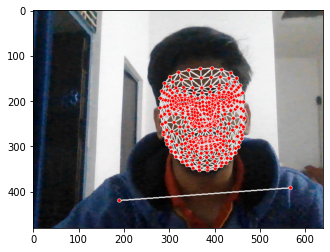

In [28]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    ret, frame = cap.read()
    image, results = mediapipe_detection(frame, holistic)
    draw_landmarks(frame, results)
    cv2.imshow('OpenCV Feed', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

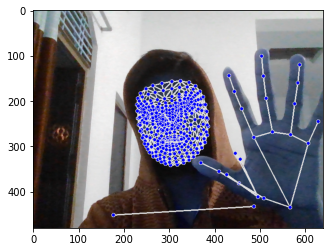

In [42]:
plt.imshow(frame)

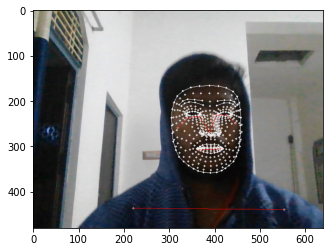

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))